# Datasets to NLP & Deep Learning

## McDonald's Store Reviews

In [1]:
%%capture
%pip install kaggle
%pip install nltk
%pip install wordcloud

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score, auc, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importar credenciales de Kaggle
!gdown -- 1cmNq5mGg0myf3dP7rmChLEUmhzXFgcuz

Downloading...
From: https://drive.google.com/uc?id=1cmNq5mGg0myf3dP7rmChLEUmhzXFgcuz
To: /content/kaggle.json
100% 69.0/69.0 [00:00<00:00, 301kB/s]


In [5]:
# Importar las bases de datos desde Kaggle
!kaggle datasets download nelgiriyewithana/mcdonalds-store-reviews

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews
License(s): other
mcdonalds-store-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews
License(s): CC0-1.0
amazon-books-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# Extracción de los datos
!unzip mcdonalds-store-reviews

Archive:  mcdonalds-store-reviews.zip
  inflating: McDonald_s_Reviews.csv  


In [7]:
# Carga de Datos y Copnversion a DataFrame
df = pd.read_csv('McDonald_s_Reviews.csv', encoding='latin-1')

df.sample(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
19386,19387,McDonald's,Fast food restaurant,"621 Broadway, Newark, NJ 07104, United States",40.771910,-74.161475,"1,564",2 years ago,I Love McDonald's I Love There French Fries A...,5 stars
20910,20911,McDonald's,Fast food restaurant,"2400 Alliance Gateway Fwy, Fort Worth, TX 7617...",32.958041,-97.307652,957,3 years ago,Good,4 stars
23916,23917,McDonald's,Fast food restaurant,"1415 E State Rd, Fern Park, FL 32730, United S...",28.655350,-81.342692,"1,617",3 years ago,Their fish sandwiches and hot fudge sundaes ar...,5 stars
12624,12625,McDonald's,Fast food restaurant,"501 W Imperial Hwy, Los Angeles, CA 90044, Uni...",33.931261,-118.282955,"2,722",2 years ago,Although the two drive thru lines were pretty ...,4 stars
11425,11426,McDonald's,Fast food restaurant,"1121 Garnet Ave, San Diego, CA 92109, United S...",32.797661,-117.249470,"1,159",3 years ago,Employees were joking around talking bad about...,1 star


In [8]:
# Estructura de la base de datos
df.shape

(33396, 10)

In [9]:
# Columnas del DataFrame
df.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [10]:
# Información de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [11]:
# Verificar valores faltante
df.isna().sum()

,0
reviewer_id,0
store_name,0
category,0
store_address,0
latitude,660
longitude,660
rating_count,0
review_time,0
review,0
rating,0


Observaremos ciertas categorias para cada columna:

In [12]:
df['store_name'].value_counts()

,count
store_name,
McDonald's,33325
ýýýMcDonald's,71


In [13]:
# Corregir los nombres para la columna `store_name`
df['store_name'].replace("ýýýMcDonald's", "McDonald's", inplace=True)

In [14]:
df['category'].value_counts()

,count
category,
Fast food restaurant,33396


In [15]:
df['store_address'].value_counts()

,count
store_address,
"9814 International Dr, Orlando, FL 32819, United States",1890
"5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States",1720
"10901 Riverside Dr, North Hollywood, CA 91602, United States",1710
"1415 E State Rd, Fern Park, FL 32730, United States",1700
"632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States",1650
"3501 Biscayne Blvd, Miami, FL 33137, United States",1570
"621 Broadway, Newark, NJ 07104, United States",1290
"1100 N US Hwy 377, Roanoke, TX 76262, United States",1168
"72-69 Kissena Blvd, Queens, NY 11367, United States",1140


In [16]:
# Convert rating_count to numeric
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=False).astype('float')

In [17]:
df.sample(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
30670,30671,McDonald's,Fast food restaurant,"9814 International Dr, Orlando, FL 32819, Unit...",28.423814,-81.461242,5468.0,4 years ago,"Clean, quick, and tastes like I expected McDon...",5 stars
21887,21888,McDonald's,Fast food restaurant,"By Mandalay Bay, 3999 S Las Vegas Blvd, Las Ve...",36.090244,-115.175822,2365.0,6 years ago,busy location with a slow line,3 stars
16523,16524,McDonald's,Fast food restaurant,"10901 Riverside Dr, North Hollywood, CA 91602,...",34.152507,-118.367904,1795.0,5 years ago,We always have fun at McDonald's,5 stars
28749,28750,McDonald's,Fast food restaurant,"1415 E State Rd, Fern Park, FL 32730, United S...",28.655350,-81.342692,1618.0,3 years ago,"Went through the drive through, nothing to com...",4 stars
11890,11891,McDonald's,Fast food restaurant,"1044 US-11, Champlain, NY 12919, United States",44.981410,-73.459820,1306.0,a week ago,Fresh Food and AWESOME TABLE SERVICE!!! 5 STAR...,5 stars


In [18]:
df['review_time'].value_counts()

,count
review_time,
4 years ago,6740
3 years ago,5522
a year ago,4809
5 years ago,4306
2 years ago,3892
6 years ago,1679
2 months ago,625
10 months ago,503
8 months ago,498


In [19]:
df['review'].value_counts()

,count
review,
Excellent,2148
Good,1264
Neutral,942
Poor,315
Terrible,292
...,...
then the worst burger here in the US,1
it's a McDonalds,1
There are employees who speak Spanish,1


In [20]:
# Replace ' star ' or ' stars ' by none
df['rating'] = df['rating'].str.replace(' star', '', regex=True)
df['rating'] = df['rating'].str.replace('s', '', regex=True)

# Convert the column to 'int' dtype
df['rating'] = df['rating'].astype('int')

In [21]:
df.sample(5)

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
22595,22596,McDonald's,Fast food restaurant,2476 Kalï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,NaN,NaN,2175.0,3 years ago,No restroom and icecream machine does not work...,1
25601,25602,McDonald's,Fast food restaurant,"632 S R L Thornton Freeway Service Rd, Dallas,...",32.744596,-96.812286,2657.0,4 years ago,Past service has been good until recently went...,1
26340,26341,McDonald's,Fast food restaurant,"1540 2nd St, Santa Monica, CA 90405, United St...",34.012219,-118.494540,3381.0,4 years ago,This Black lady at cash register took my order...,1
11013,11014,McDonald's,Fast food restaurant,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,4922.0,5 years ago,Really bad customer service. Not once but twic...,1
3018,3019,McDonald's,Fast food restaurant,"429 7th Ave, New York, NY 10001, United States",40.750506,-73.990583,2052.0,5 months ago,Busy but still giving outstanding service!,5


Text(0, 0.5, 'Frecuencia')

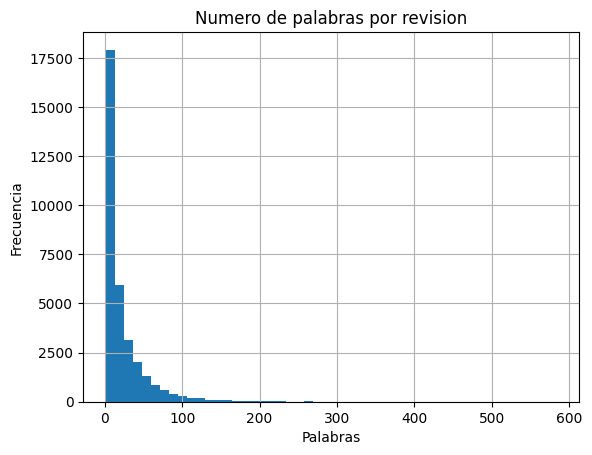

In [22]:
words_per_review = df.review.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 50)
plt.title('Numero de palabras por revision')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

Observamos que la mayoria de revisiones se encuentran en un rango de 0 a 100 palabras por comentarios hechos por clientes.

In [23]:
words_per_review.mean()

22.32414061564259

In [24]:
# Distribucion de los rating
df['rating'].value_counts()

,count
rating,
5,10274
1,9431
4,5787
3,4818
2,3086


In [25]:
percent_val = 100 * df.rating.value_counts()/df.shape[0]
percent_val = percent_val.sort_index()

percent_val

,count
rating,
1,28.239909
2,9.240628
3,14.426877
4,17.328423
5,30.764163


Text(0, 0.5, 'Porcentaje (%)')

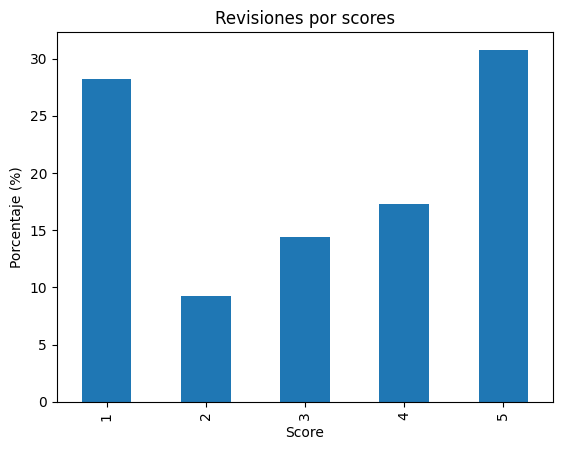

In [26]:
percent_val.plot.bar()
plt.title('Revisiones por scores')
plt.xlabel('Score')
plt.ylabel('Porcentaje (%)')

Observamos que las reseñas negativas y positivas presentan una distribucion simetrica, por lo que crearemos una nueva columna llamada `clasificación` para realizar un análisis de sentimiento.

Para propositos del analisis de sentimiento convertiremos todos los ratings en valores binarios con las siguientes reglas:
- ratings de 4 o 5 seran convertidos a 1 (positivo)
- ratings de 1 o 2 seran convertidos a 0 (negativo)
- ratings de 3 seran removidos del analisis

In [27]:
# Crear nueva columna llamada `classification`
df['classification'] = np.where(df.rating > 3, 1, 0)

df['classification'].value_counts()

,count
classification,
0,17335
1,16061


In [28]:
# Removiendo valores neutrales
df = df[df.rating != 3]

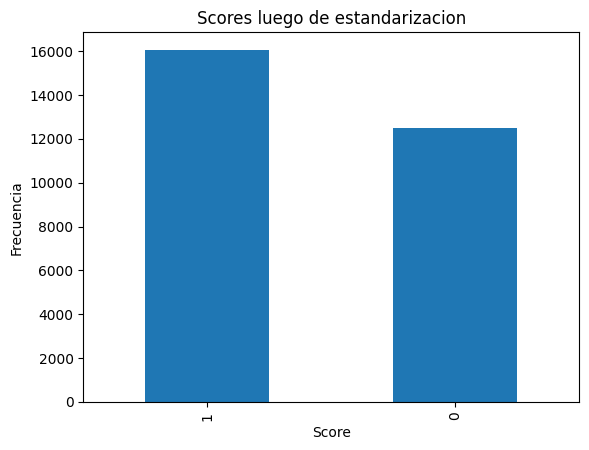

In [29]:
# Grafico para visualizar las clases
df.classification.value_counts().plot.bar()
plt.title('Scores luego de estandarizacion')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()

## Preprocesamiento

El preprocesamiento de texto y la normalizacion es crucial antes de desarrollar un modelo de NLP, algunos pasos importantes son:

1. Convertir palabras a minusculas
2. remover caracteres especiales
3. remover stopwords y palabras de alta frecuencia

Procedamos con la primera fase

In [30]:
df['reviews_new'] = df.review.apply(lambda x: x.lower())

In [31]:
nltk.download('punkt_tab')

token_lists = [word_tokenize(each) for each in df.review]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de tokens unicos antes: ", len(set(tokens)))

token_lists_lower = [word_tokenize(each) for each in df.reviews_new]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Numero de tokens unicos nuevos: ", len(set(tokens_lower)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Numero de tokens unicos antes:  19859
Numero de tokens unicos nuevos:  15873


In [32]:
(len(set(tokens)) - len(set(tokens_lower))) / len(set(tokens))

0.20071504103932725

El numero de tokens han bajado en cerca del 20% con la normalizacion

## Remoción de caracteres especiales

In [33]:
# Seleccionando los caracteres no alfa numericos que no son espacios
special_chars = df.reviews_new.apply(lambda x: [each for each in list(x) if not each.isalnum() and each != ' '])

# obtener una lista de listas
flat_list = [item for sublist in special_chars for item in sublist]

# caracteres especiales unicos
print(set(flat_list))

{')', '\\', '>', ':', '#', ';', '¿', '\n', '{', '@', '.', '-', '&', '*', '^', '~', '/', '_', '!', "'", '(', ']', '?', '+', ',', '}', '=', '[', '"', '<', '%', '$'}


*Ahora* removamos los caracteres especiales de los reviews:

In [34]:
import re
review_backup = df.reviews_new.copy()

df.reviews_new = df.reviews_new.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))

Miremos como se ven algunos de los resultados luego de remover esto

In [35]:
print("Review anterior:")
review_backup.values[7]

Review anterior:


'came in and ordered a large coffee w/no ice. they handed me a cup that was less than half way full. i asked the employee, flor, if they could give me a large coffee w/no ice and she said no. i was willing to pay more to get a full cup of coffee. i always get a large sweet tea w/no ice and itï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½'

In [36]:
print("Review nuevo:")
df.reviews_new[7]

Review nuevo:


'came in and ordered a large coffee w no ice  they handed me a cup that was less than half way full  i asked the employee  flor  if they could give me a large coffee w no ice and she said no  i was willing to pay more to get a full cup of coffee  i always get a large sweet tea w no ice and it '

El numero de tokens unicos que se han borrado son:

In [37]:
token_lists = [word_tokenize(each) for each in df.review]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de token unicos antes: ", len(set(tokens)))

token_lists = [word_tokenize(each) for each in df.reviews_new]
tokens = [item for sublist in token_lists for item in sublist]
print("Numero de tokens unicos despues: ", len(set(tokens)))

Numero de token unicos antes:  19859
Numero de tokens unicos despues:  13233


In [38]:
(19859 - 13233) / 19859

0.33365224835087365

## Words Cloud

3490938


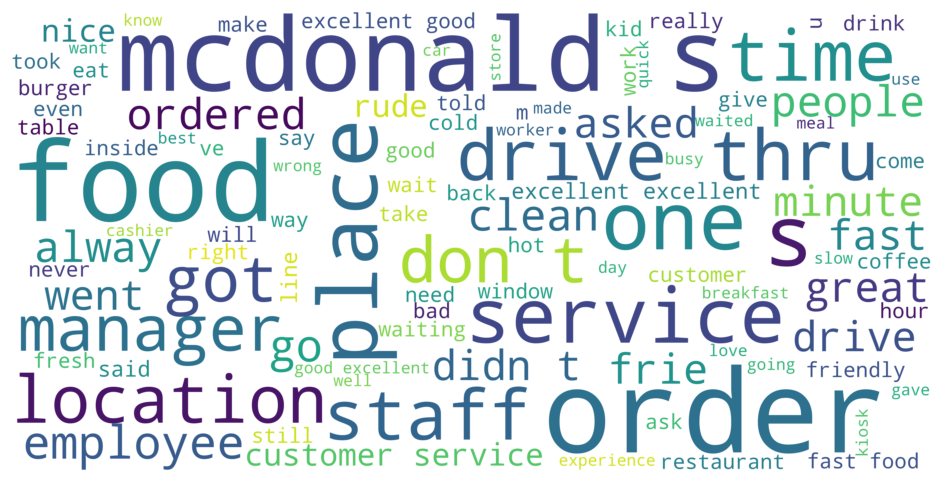

In [39]:
word_cloud_text = ''.join(df['reviews_new'])
print(len(word_cloud_text))

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

El wordcloud muestra que hay muchos reviews que hablan sobre temas relacionados con la cadena de comida rapida (order, food, place, one), tambien se observan otras palabras como great, clean and friendly.

## Stopwords y palabras de alta/baja frecuencia

Vamos a remover estas palabras

In [40]:
nltk.download('stopwords')

noise_words = []
stopwords_corpus = nltk.corpus.stopwords
eng_stop_words = stopwords_corpus.words('english')
noise_words.extend(eng_stop_words)
print(len(noise_words))

179


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Encontremos las palabras de alta y baja frecuencia, que definiremos como el 1 % de las palabras que aparecen con más frecuencia en las reseñas, así como el 1 % de las palabras que aparecen con menos frecuencia en las reseñas (después de ajustar por mayúsculas y minúsculas y caracteres especiales).

In [41]:
one_percentile = int(len(set(tokens)) * 0.01)
top_1_percentile = Counter(tokens).most_common(one_percentile)

top_1_percentile[:10]

[('the', 30617),
 ('and', 22131),
 ('i', 18090),
 ('to', 17573),
 ('a', 13125),
 ('was', 10888),
 ('it', 9325),
 ('they', 8353),
 ('is', 8015),
 ('s', 7653)]

Text(0, 0.5, 'Frecuencia')

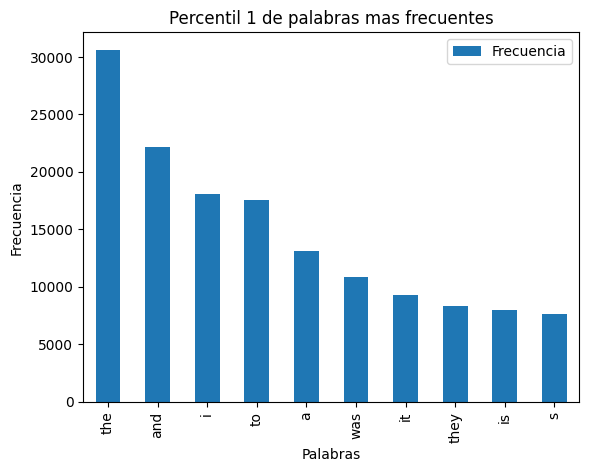

In [42]:
pd.DataFrame(top_1_percentile[:10], columns=['Palabras','Frecuencia']).set_index('Palabras').plot(kind='bar')
plt.title('Percentil 1 de palabras mas frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

In [43]:
bottom_1_percentile = Counter(tokens).most_common()[-one_percentile:]
bottom_1_percentile[:10]

[('oldschool', 1),
 ('0f', 1),
 ('quieter', 1),
 ('fab', 1),
 ('rattlesnakes', 1),
 ('threws', 1),
 ('suvrice', 1),
 ('snickerdoodle', 1),
 ('bang', 1),
 ('1hour', 1)]

In [44]:
noise_words.extend([word for word,val in top_1_percentile])
noise_words.extend([word for word,val in bottom_1_percentile])

Las stopwords y las palabras de alta/baja frecuencia ahora se han agregado a noise_words, que se eliminarán de las revisiones antes de entrenar los modelos de aprendizaje automático.

Es poco probable que las stopwords sean tan útiles, ya que esperamos que aparezcan con la misma frecuencia en las críticas positivas y negativas. Las palabras poco comunes pueden ser más significativas y, en teoría, podrían indicar el sentimiento de la revisión

## Análisis de Sentimiento

Entrenaremos y evaluaremos 4 modelos de machine learning: `Regresión Logística`, `SVM`, `Decision Tree` y `Random Forest`.

In [45]:
# Definir la variable objetivo y sus características
X = df['reviews_new']
y = df['classification']

In [46]:
# Dividir DataFrame en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Vectorizar texto y eliminar stopwords
counter = CountVectorizer(stop_words = 'english')

In [48]:
X_train = counter.fit_transform(X_train)
X_test = counter.transform(X_test)

In [49]:
# Crear y entrenar el modelo
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [50]:
# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Exactitud del Modelo:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))

Exactitud del Modelo: 0.908852344296711
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      2494
           1       0.91      0.94      0.92      3222

    accuracy                           0.91      5716
   macro avg       0.91      0.90      0.91      5716
weighted avg       0.91      0.91      0.91      5716



In [51]:
# Crear y entrenar el modelo
svm_model = LinearSVC(random_state=42)

svm_model.fit(X_train, y_train)

LinearSVC(random_state=42)

In [52]:
# Hacer predicciones
y_pred_svm = svm_model.predict(X_test)

# Evaluar
print("Exactitud del Modelo:", accuracy_score(y_test, y_pred_svm))
print("Reporte de Clasificación (SVM):\n", classification_report(y_test, y_pred_svm))

Exactitud del Modelo: 0.9078026592022393
Reporte de Clasificación (SVM):
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      2494
           1       0.90      0.94      0.92      3222

    accuracy                           0.91      5716
   macro avg       0.91      0.90      0.91      5716
weighted avg       0.91      0.91      0.91      5716



In [53]:
# Crear y entrenar el modelo
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
# Hacer predicciones
y_pred_tree = tree_model.predict(X_test)

# Evaluar
print("Exactitud del Modelo:", accuracy_score(y_test, y_pred_tree))
print("Reporte de Clasificación (Árbol de Decisión):\n", classification_report(y_test, y_pred_tree))

Exactitud del Modelo: 0.8876836948915325
Reporte de Clasificación (Árbol de Decisión):
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      2494
           1       0.89      0.91      0.90      3222

    accuracy                           0.89      5716
   macro avg       0.89      0.88      0.89      5716
weighted avg       0.89      0.89      0.89      5716



In [55]:
# Crear y entrenar el modelo
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Hacer predicciones
y_pred_rf = rf_model.predict(X_test)

# Evaluar
print("Exactitud del Modelo:", accuracy_score(y_test, y_pred_rf))
print("Reporte de Clasificación (Random Forest):\n", classification_report(y_test, y_pred_rf))

Exactitud del Modelo: 0.915850244926522
Reporte de Clasificación (Random Forest):
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      2494
           1       0.92      0.93      0.93      3222

    accuracy                           0.92      5716
   macro avg       0.91      0.91      0.91      5716
weighted avg       0.92      0.92      0.92      5716



In [57]:
def graficar_curvas_roc_con_valores(y_test, predicciones, nombres_modelos):
    """
    Genera una gráfica comparativa de las curvas ROC-AUC utilizando valores predichos.

    Parámetros:
    - y_test: etiquetas verdaderas del conjunto de prueba.
    - predicciones: lista de arrays con los valores predichos para cada modelo (probabilidades o puntuaciones).
    - nombres_modelos: lista de nombres correspondientes a los modelos.

    Devuelve:
    - None
    """
    plt.figure(figsize=(10, 8))

    for pred, nombre in zip(predicciones, nombres_modelos):
        # Calcular curva ROC y AUC
        fpr, tpr, _ = roc_curve(y_test, pred)
        auc_roc = roc_auc_score(y_test, pred)

        # Graficar curva ROC
        plt.plot(fpr, tpr, label=f'{nombre} (AUC = {auc_roc:.2f})')

    # Gráfica base
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparación de curvas ROC-AUC')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

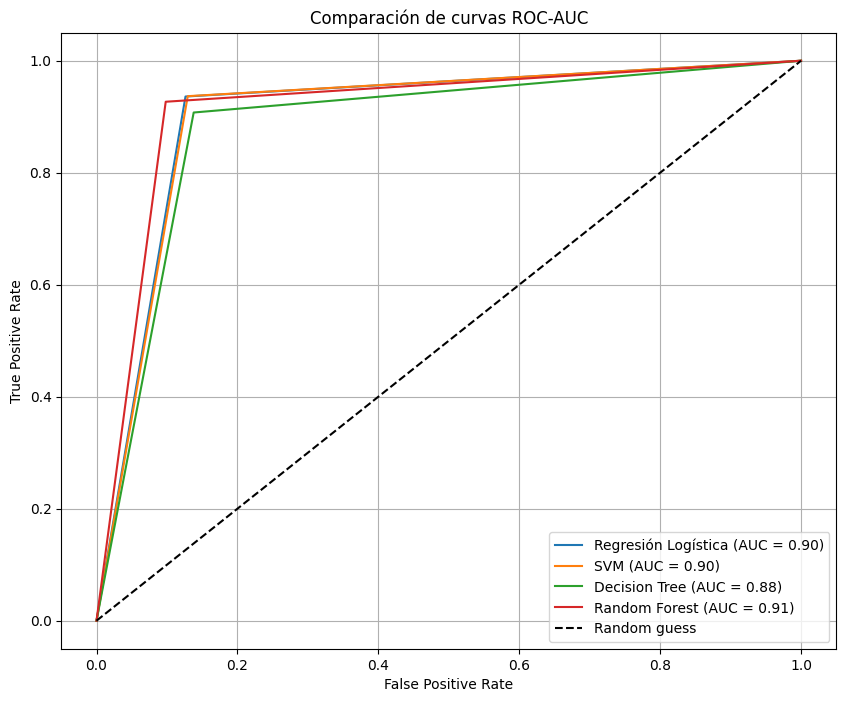

In [58]:
predicciones = [
    y_pred,    # Valores predichos del modelo de regresión logística
    y_pred_svm,          # Valores predichos del modelo SVM
    y_pred_tree, # Valores predichos del Árbol de Decisión
    y_pred_rf  # Valores predichos del Bosque Aleatorio
]

nombres_modelos = ['Regresión Logística', 'SVM', 'Decision Tree', 'Random Forest']

graficar_curvas_roc_con_valores(y_test, predicciones, nombres_modelos)

El mejor modelo de clasificación para las reseñas de los clientes es `Random Forest` dado que logra diferenciar mejor las clases y se obtiene un `F1-Score` mas elevado para la clase objetivo.

#TF-IDF


Técnica de vectorización de texto que se utiliza comúnmente en el procesamiento del lenguaje natural (NLP) y el aprendizaje automático para transformar datos de texto en características numéricas

La frecuencia de término (`TF`) mide cuántas veces aparece una palabra en un documento, mientras que la frecuencia inversa de documento (`IDF`) reduce el peso de las palabras que son comunes en todos los documentos

In [59]:
# Define the variable objetivo and its characteristics
X = df['reviews_new']
y = df['classification']

# Split DataFrame into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Crear y ajustar el vectorizador TF-IDF en el conjunto de entrenamiento
tfidf_vectorizer = TfidfVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4))

# Ajustar el vectorizador TF-IDF en el conjunto de entrenamiento
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transformar el conjunto de prueba usando el vocabulario del conjunto de entrenamiento
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [61]:
# Crear y entrenar el modelo de Regresión Logística
lr_tfidf_model = LogisticRegression(random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(random_state=42)

In [62]:
# Hacer predicciones
y_pred_lr = model.predict(X_test_tfidf)

# Evaluar el modelo
print("Exactitud del Modelo:", accuracy_score(y_test, y_pred_lr))
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred_lr))

Exactitud del Modelo: 0.9181245626312107
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      2494
           1       0.95      0.91      0.93      3222

    accuracy                           0.92      5716
   macro avg       0.92      0.92      0.92      5716
weighted avg       0.92      0.92      0.92      5716



In [63]:
# Modelo SVM
svm_tfidf_model = LinearSVC(random_state=42)

svm_tfidf_model.fit(X_train_tfidf, y_train)

LinearSVC(random_state=42)

In [64]:
# Predicciones y evaluación
y_pred_tfidf_svm = svm_tfidf_model.predict(X_test_tfidf)
print("Exactitud del Modelo:", accuracy_score(y_test, y_pred_tfidf_svm))
print("Reporte de Clasificación (SVM):\n", classification_report(y_test, y_pred_tfidf_svm))

Exactitud del Modelo: 0.9364940517844647
Reporte de Clasificación (SVM):
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2494
           1       0.95      0.93      0.94      3222

    accuracy                           0.94      5716
   macro avg       0.93      0.94      0.94      5716
weighted avg       0.94      0.94      0.94      5716



In [65]:
# Crear y entrenar el modelo
tree_tfidf_model = DecisionTreeClassifier(random_state=42)

tree_tfidf_model.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
# Hacer predicciones
y_pred_tfidf_tree = tree_tfidf_model.predict(X_test_tfidf)

# Evaluar
print("Exactitud del Modelo:", accuracy_score(y_test, y_pred_tfidf_tree))
print("Reporte de Clasificación (Árbol de Decisión):\n", classification_report(y_test, y_pred_tfidf_tree))

Exactitud del Modelo: 0.8789363191042687
Reporte de Clasificación (Árbol de Decisión):
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      2494
           1       0.88      0.92      0.90      3222

    accuracy                           0.88      5716
   macro avg       0.88      0.87      0.88      5716
weighted avg       0.88      0.88      0.88      5716



In [67]:
# Modelo Random Forest
rf_tfidf_model = RandomForestClassifier(random_state=42)

rf_tfidf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [68]:
# Predicciones y evaluación
y_pred_tfidf_rf = rf_tfidf_model.predict(X_test_tfidf)
print("Exactitud del Modelo:", accuracy_score(y_test, y_pred_tfidf_rf))
print("Reporte de Clasificación (Random Forest):\n", classification_report(y_test, y_pred_tfidf_rf))

Exactitud del Modelo: 0.9132260321903429
Reporte de Clasificación (Random Forest):
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      2494
           1       0.92      0.93      0.92      3222

    accuracy                           0.91      5716
   macro avg       0.91      0.91      0.91      5716
weighted avg       0.91      0.91      0.91      5716



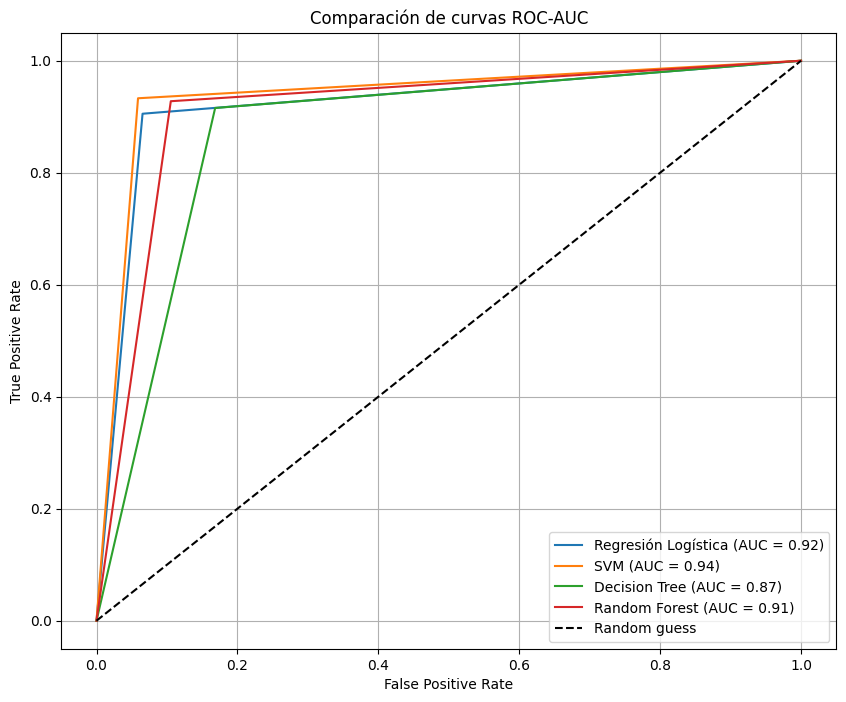

In [69]:
predicciones = [
    y_pred_lr,    # Valores predichos del modelo de regresión logística
    y_pred_tfidf_svm,          # Valores predichos del modelo SVM
    y_pred_tfidf_tree, # Valores predichos del Árbol de Decisión
    y_pred_tfidf_rf  # Valores predichos del Bosque Aleatorio
]

nombres_modelos = ['Regresión Logística', 'SVM', 'Decision Tree', 'Random Forest']

graficar_curvas_roc_con_valores(y_test, predicciones, nombres_modelos)

Considerando la técnica `TF-IDF` se obtiene que el modelo `SVM` logra una mejor curva ROC la cual obtiene un AUC de 94%.

## Redes Neuronales

In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 300
max_length = 500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences, maxlen=max_length)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(max_length, 1 )))
model.add(Embedding(max_words, 32))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 500, 1, 32)          │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,048,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,057,857 (7.85 MB)

 Trainable params: 2,057,857 (7.85 MB)

 Non-trainable params: 0 (0.00 B)

In [72]:
hist = model.fit(X, y, validation_split=0.2, epochs=5, batch_size=20)

Epoch 1/5
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - accuracy: 0.7731 - loss: 0.4457 - val_accuracy: 0.8889 - val_loss: 0.2647
Epoch 2/5
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.8799 - loss: 0.2694 - val_accuracy: 0.8942 - val_loss: 0.2511
Epoch 3/5
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 41s 30ms/step - accuracy: 0.8958 - loss: 0.2429 - val_accuracy: 0.9027 - val_loss: 0.2291
Epoch 4/5
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 36s 31ms/step - accuracy: 0.9083 - loss: 0.2178 - val_accuracy: 0.9062 - val_loss: 0.2238
Epoch 5/5
1144/1144 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.9169 - loss: 0.1978 - val_accuracy: 0.9207 - val_loss: 0.2010


[]

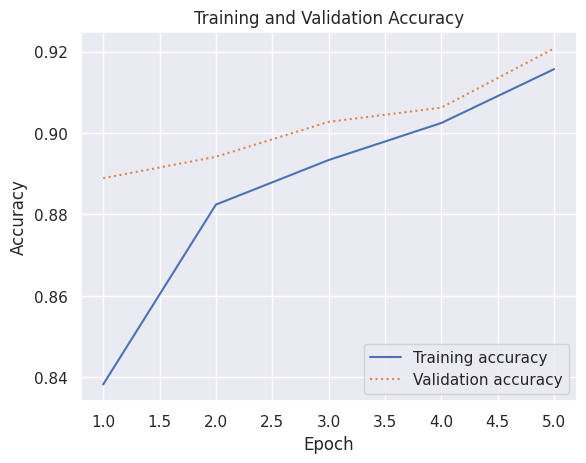

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Observamos que con un modelo de `red neuronal` obtenemos una metrica de precision del `92%` para el conjunto de validación, lo cual no supera un `94%` para el `SVM`.